# Loan Default Risk - Exploratory Data Analysis (EDA)

This notebook explores the dataset to understand the key factors contributing to loan default risk. We will perform:
1. **Data Cleaning & Overview**: Handling missing values and duplicates.
2. **Univariate Analysis**: Understanding the distribution of individual features.
3. **Bivariate Analysis**: Analyzing relationships between features and the target variable (`loan_status`).
4. **Correlation Analysis**: Checking for multicollinearity.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set plot style
sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)

print("Current Working Directory:", os.getcwd())

Current Working Directory: c:\Users\sidha\OneDrive\Desktop\loan-default-risk-ml\notebooks


In [6]:
# Load Data
# Robust feature to find the data file
possible_paths = [
    '../data/raw/loan_data.csv',         # From notebooks dir
    'data/raw/loan_data.csv',            # From project root
    '../data/raw/Loan_default.csv',      # Alternative file
    'data/raw/Loan_default.csv'          # Alternative file from root
]

df = None
for path in possible_paths:
    if os.path.exists(path):
        try:
            df = pd.read_csv(path)
            print(f"Successfully loaded data from: {path}")
            break
        except Exception as e:
            print(f"Found file at {path} but failed to load: {e}")

if df is None:
    raise FileNotFoundError(f"Could not find dataset in any of the checked paths: {possible_paths}")

Successfully loaded data from: ../data/raw/loan_data.csv


## 1. Data Overview

In [7]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [9]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### Missing Values & Duplicates

In [10]:
print("Missing Values:")
print(df.isnull().sum())

print("\nDuplicate Rows:", df.duplicated().sum())

Missing Values:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Duplicate Rows: 165


## 2. Univariate Analysis

### Target Variable: `loan_status`

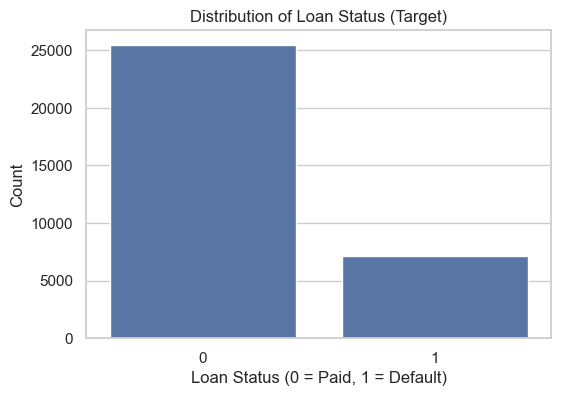

Default Rate: 21.82%


In [11]:
plt.figure(figsize=(6, 4))
if 'loan_status' in df.columns:
    sns.countplot(x='loan_status', data=df)
    plt.title('Distribution of Loan Status (Target)')
    plt.xlabel('Loan Status (0 = Paid, 1 = Default)')
    plt.ylabel('Count')
    plt.show()

    # Calculate percentage
    default_rate = df['loan_status'].mean()
    print(f"Default Rate: {default_rate:.2%}")
else:
    print("Target column 'loan_status' not found.")

### Numerical Features

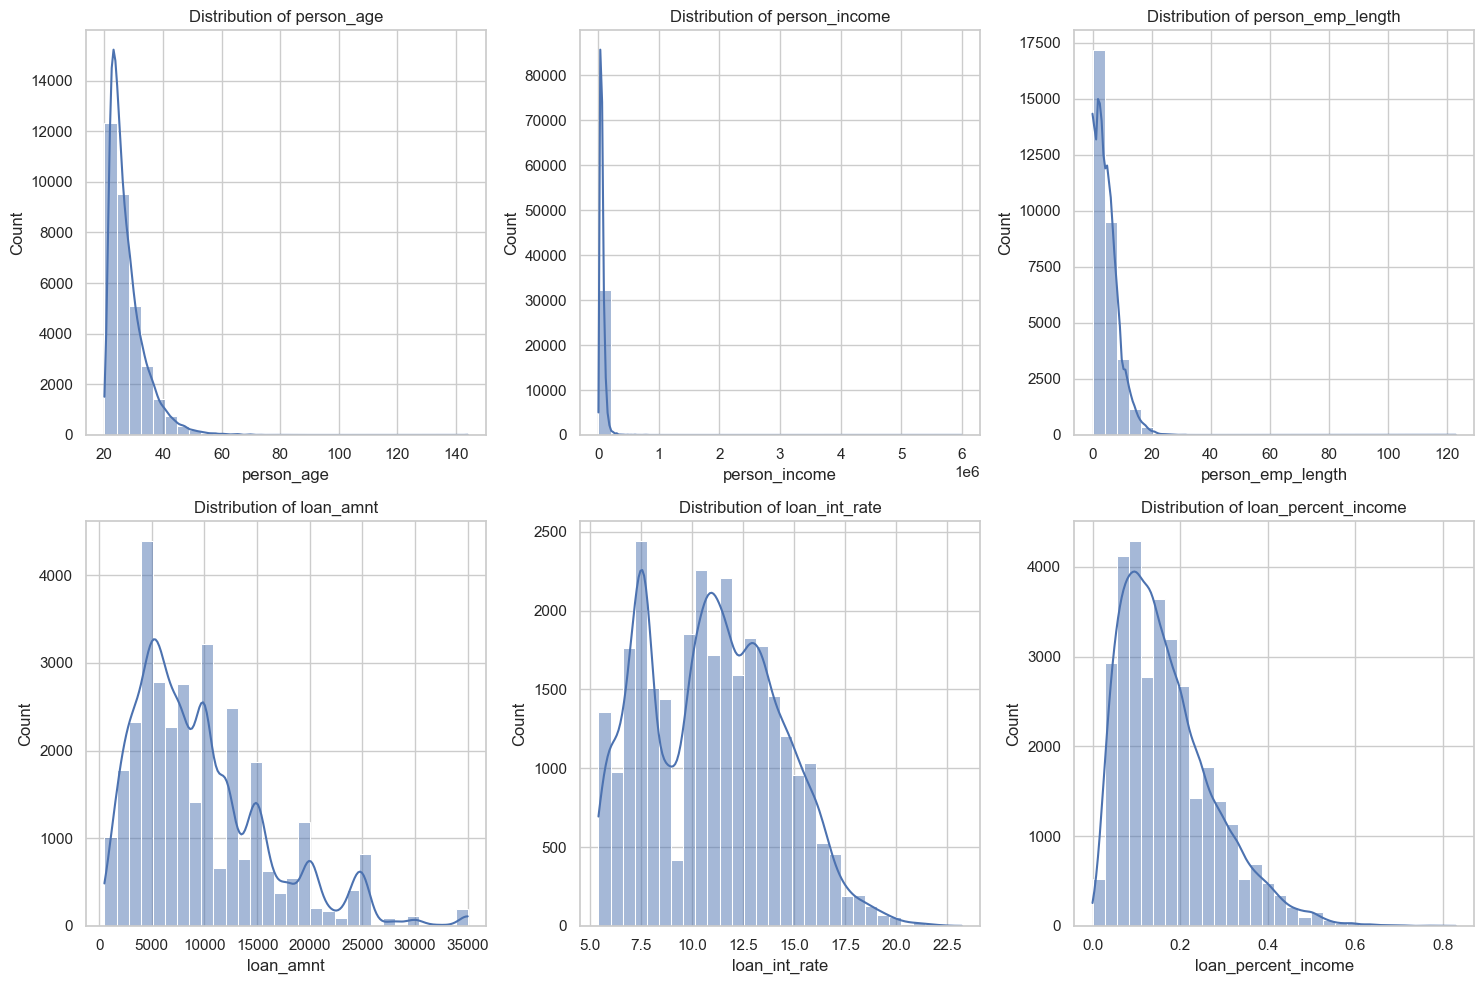

In [12]:
num_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']

# Filter for existing columns
existing_num_features = [col for col in num_features if col in df.columns]

if existing_num_features:
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(existing_num_features):
        plt.subplot(2, 3, i + 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

### Categorical Features

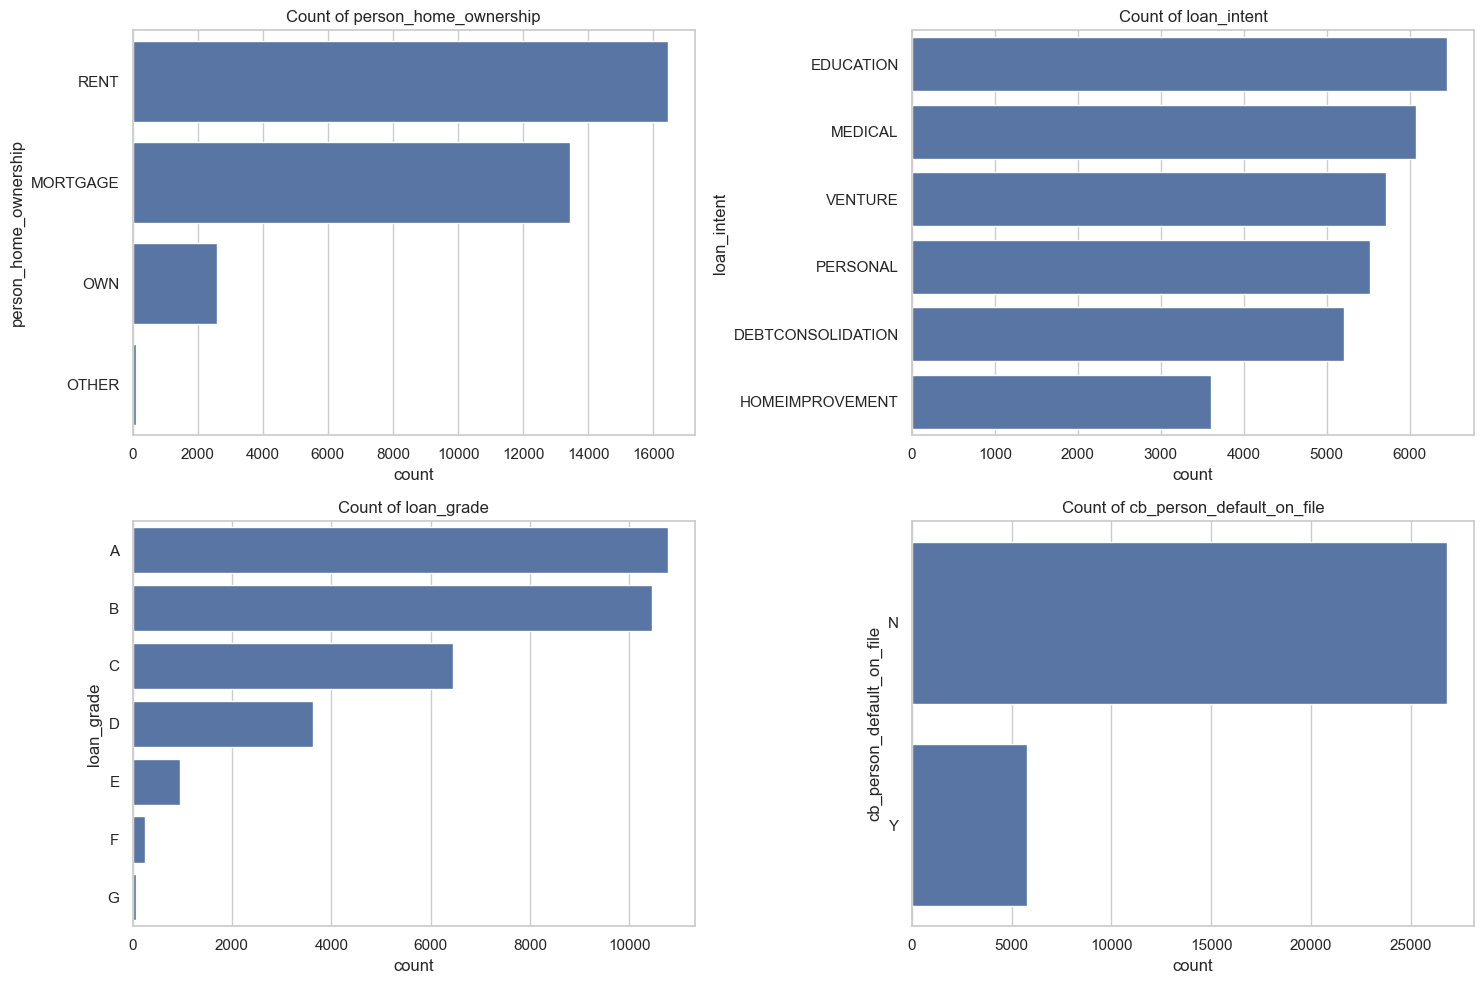

In [13]:
cat_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Filter for existing columns
existing_cat_features = [col for col in cat_features if col in df.columns]

if existing_cat_features:
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(existing_cat_features):
        plt.subplot(2, 2, i + 1)
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Count of {col}')
    plt.tight_layout()
    plt.show()

## 3. Bivariate Analysis

Relationships between features and the target variable.

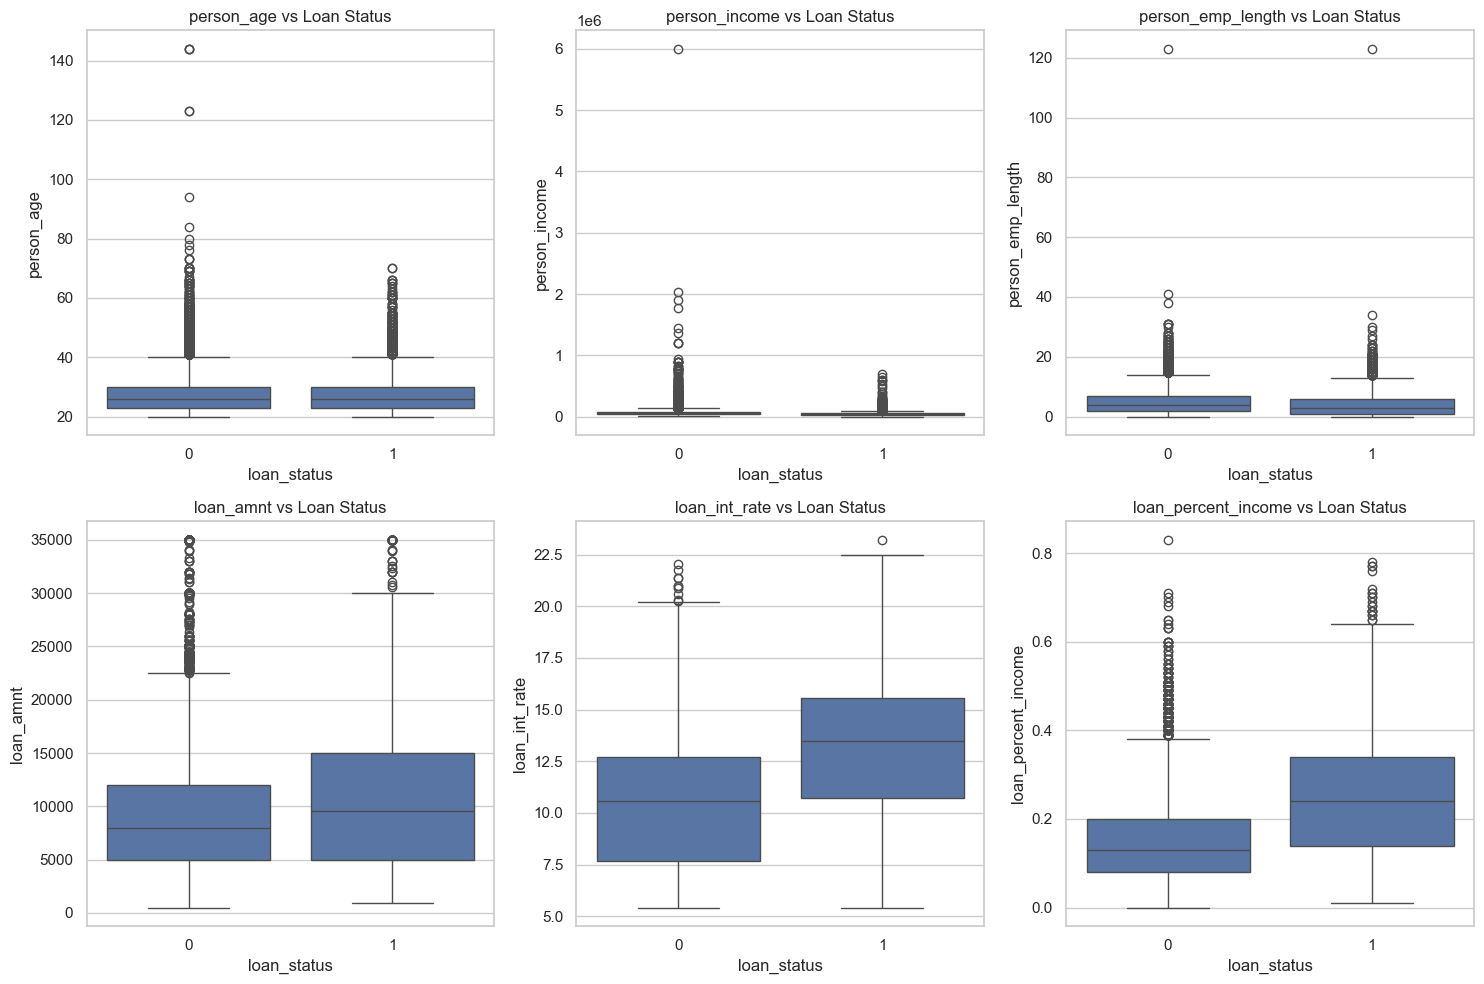

In [14]:
if 'loan_status' in df.columns and existing_num_features:
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(existing_num_features):
        plt.subplot(2, 3, i + 1)
        sns.boxplot(x='loan_status', y=col, data=df)
        plt.title(f'{col} vs Loan Status')
    plt.tight_layout()
    plt.show()

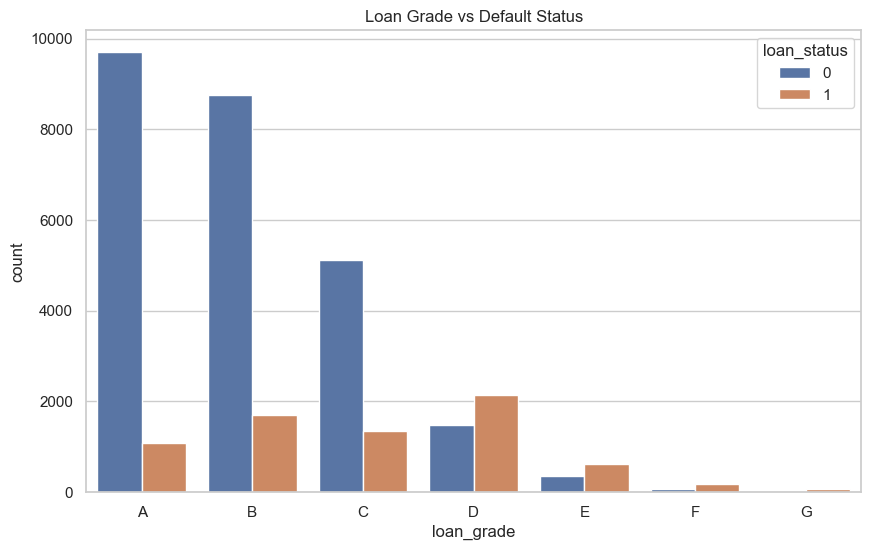

In [15]:
# Loan Grade vs Default Rate
if 'loan_grade' in df.columns and 'loan_status' in df.columns:
    plt.figure(figsize=(10, 6))
    grade_order = sorted(df['loan_grade'].unique())
    sns.countplot(x='loan_grade', hue='loan_status', data=df, order=grade_order)
    plt.title('Loan Grade vs Default Status')
    plt.show()

## 4. Correlation Analysis

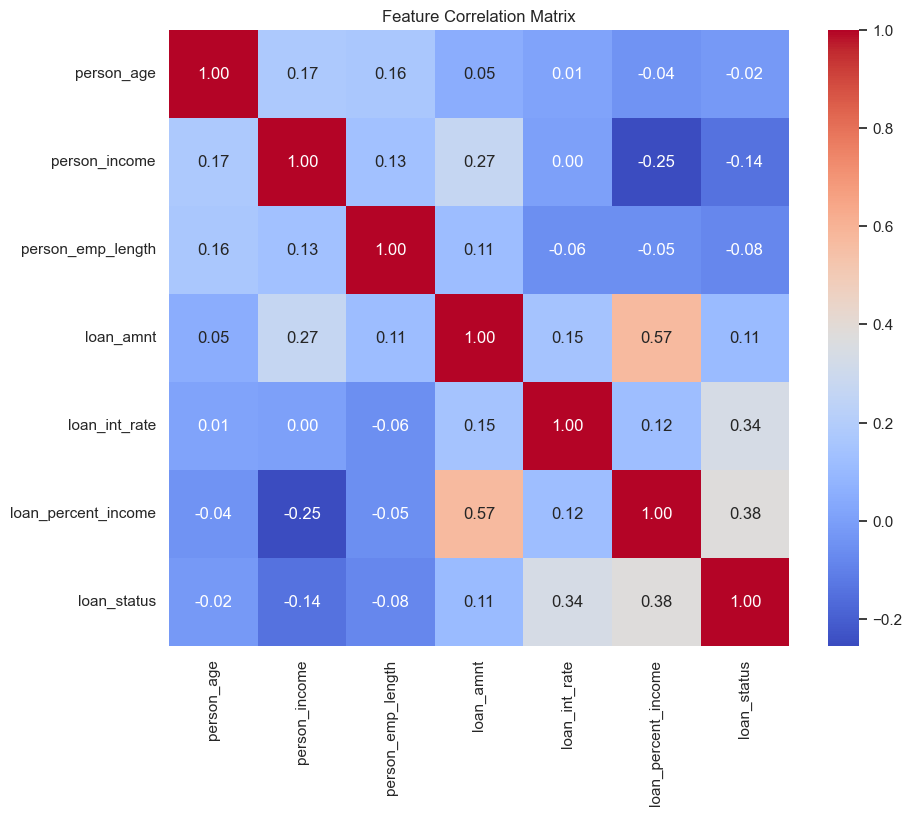

In [16]:
if existing_num_features and 'loan_status' in df.columns:
    plt.figure(figsize=(10, 8))
    corr = df[existing_num_features + ['loan_status']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Feature Correlation Matrix')
    plt.show()